In [1]:
import pandas as pd
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
s=pd.read_csv('C:\\Users\\vigne\\Downloads\\train-data.csv')

In [3]:
s.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
for i in range(0,len(s[['Power']])):
    if pd.isna(i)==True:
        s['Power'][i]='0'
    elif s['Power'][i]=='null bhp':
        s['Power'][i]='0'


<ipython-input-4-16914dd481f1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['Power'][i]='0'


In [5]:
df=s[['Kilometers_Driven']]
df1= s[['Mileage','Engine','Power','Seats']].replace(to_replace=r'([a-z/]+|[A-Z/]+)', value='', regex=True)
df2=pd.concat([df,df1],axis=1, join='inner')
df2['Mileage'] = df2['Mileage'].astype(float)
df2['Engine'] = df2['Engine'].astype(float)
df2['Power'] =df2['Power'].astype(float)
df2=df2.fillna(0)
df2

,Kilometers_Driven,Mileage,Engine,Power,Seats
0,72000,26.60,998.0,58.16,5.0
1,41000,19.67,1582.0,126.20,5.0
2,46000,18.20,1199.0,88.70,5.0
3,87000,20.77,1248.0,88.76,7.0
4,40670,15.20,1968.0,140.80,5.0
...,...,...,...,...,...
6014,27365,28.40,1248.0,74.00,5.0
6015,100000,24.40,1120.0,71.00,5.0
6016,55000,14.00,2498.0,112.00,8.0
6017,46000,18.90,998.0,67.10,5.0


In [6]:
x=df2.values.tolist()
len(x)

6019

In [7]:
def arr(y):
    x=[]
    for i in range(0,len(y)):
        for j in range(0,len(y[i])):
            x.append(y[i][j])
    return x

In [8]:
def conv(y):
    x=[]
    for i in range(0,len(y)):
        y[i]=int(y[i])

In [9]:
df3=s[['Price']]
df3= df3[['Price']].replace(to_replace=r'([a-z/]+|[A-Z/]+)', value='', regex=True)
df3['Price'] = df3['Price'].astype(float)
y=df3.values.tolist()
y=arr(y)
conv(y)
len(y)

6019

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [11]:
len(X_test)

1505

In [12]:
clf = svm.SVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.12425249169435217

In [13]:
n=random.randint(0,55)
print(n)
print(y_test[n])
a=[]
a.append(X_test[n])
clf.predict(a)

28
4


array([3])

In [14]:
def knneighbours(X_train,X_test,y_train,y_test,k):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    return neigh.score(X_test,y_test)

In [15]:
knneighbours(X_train,X_test,y_train,y_test,3)

0.12624584717607973

In [16]:
knneighbours(X_train,X_test,y_train,y_test,1)

0.14950166112956811

In [17]:
acc=[]
x=[]
for i in range(1,12):
    acc.append(knneighbours(X_train,X_test,y_train,y_test,i))
    x.append(i)
print(acc)

[0.14950166112956811, 0.1362126245847176, 0.12624584717607973, 0.13953488372093023, 0.14285714285714285, 0.14883720930232558, 0.15282392026578073, 0.14883720930232558, 0.14551495016611296, 0.1415282392026578, 0.13023255813953488]


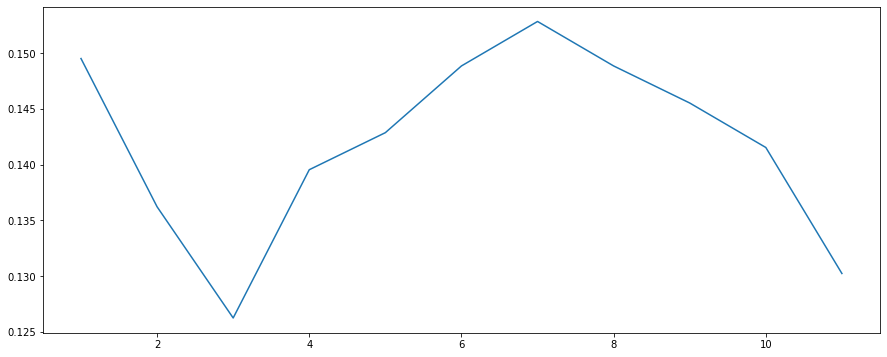

In [18]:
plt.figure(figsize=(15,6))  
plt.plot(x, acc)
plt.show()

In [19]:
ml_model = DecisionTreeClassifier()
ml_model = ml_model.fit(X_train, y_train)
ml_model.score(X_train, y_train)

0.9809481612760301